In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

df = pd.read_csv("uniqlo_stock_2012-2016.csv",parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,43310,43660,43090,43340,358200,15547803000


In [2]:
import warnings
warnings.filterwarnings('ignore')
#useful to set equal to 'once'

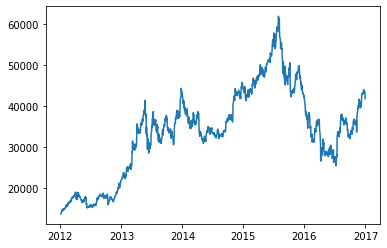

In [3]:
plt.plot(df.index, df['Close'])
#this data is not stationary because the ways that it changes are not the same

In [4]:
df.loc['2016-10']

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-10-31,35690,36030,35450,35460,344400,12260234000
2016-10-28,36020,36450,35980,35980,454200,16400925000
2016-10-27,36250,36370,35600,35770,426500,15291775000
2016-10-26,36840,36850,36380,36450,353400,12904237000
2016-10-25,36500,36940,36450,36850,400800,14747028000
2016-10-24,36650,36660,36000,36300,365000,13238639000
2016-10-21,36350,36850,36180,36300,579900,21125073000
2016-10-20,34910,36330,34910,36330,751800,27080028000
2016-10-19,34900,35050,34600,35020,356500,12436404000


In [5]:
#find means for each value for each week
df.resample('W').mean()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2012-01-08,13920.0,13973.333333,13696.666667,13790.0,6.120333e+05,8.462075e+09
2012-01-15,14377.5,14630.000000,14230.000000,14567.5,1.019975e+06,1.480215e+10
2012-01-22,14800.0,14908.000000,14702.000000,14794.0,5.475800e+05,8.120263e+09
2012-01-29,14832.0,15010.000000,14772.000000,14948.0,5.902400e+05,8.795512e+09
2012-02-05,15212.0,15330.000000,15090.000000,15256.0,5.479400e+05,8.341651e+09
...,...,...,...,...,...,...
2016-12-04,40556.0,40842.000000,40156.000000,40430.0,6.790200e+05,2.744038e+10
2016-12-11,40818.0,41306.000000,40390.000000,40894.0,8.781800e+05,3.621516e+10
2016-12-18,43434.0,43634.000000,42692.000000,43112.0,5.856000e+05,2.526562e+10


<AxesSubplot:xlabel='Date'>

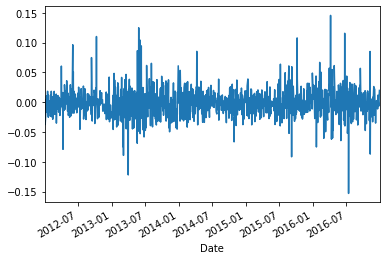

In [6]:
#to transform a stationary process
df['Return']=df['Close'].pct_change()
df['Return'].plot()

# Autocorrelation and Partial Autocorrelation

autocorrelation - how well a time series correlates with a lagged copy of itself at a particular lag interval

ACF = used to estimate MA order - number of lags that exceed the confidence interval

PACF = used to estimate AR order - number of lags that exceed the confidence interval

In [14]:
df = df.dropna()

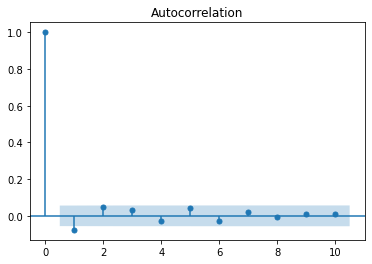

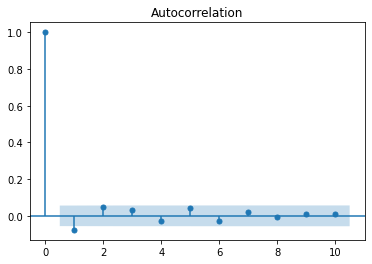

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df[['Return']], lags = 10, missing='drop')

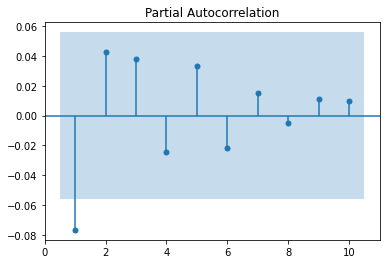

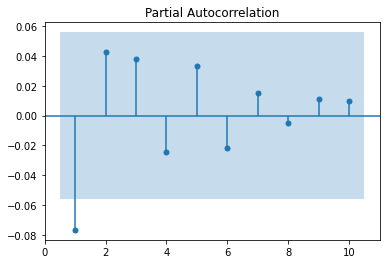

In [18]:
plot_pacf(df[['Return']], zero = False, lags = 10)

 # ARMA
 
AR is helping you account for past values whereas the MA is helping you account for past errors. 

AR (autoregression) - past values are used to predict the future ones

MA (Moving average) - past and present errors are used to predict future values - impacts of a random short-term fluctuations is decreased 

In [20]:
from statsmodels.tsa.arima_model import ARMA

#first value for order indicates AR lags
#second value for order indicated MA lags

model = ARMA(df['Return'],order=(1,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [21]:
# fit the model to the data
results = model.fit()

In [24]:
#plot the forecasted return for the next 10 days
results_df = pd.DataFrame(results.forecast(steps=10)[0])
results_df.head()

,0
0,-0.000136
1,-0.000770
2,-0.000577
3,-0.000636
4,-0.000618


<AxesSubplot:title={'center':'Stock Return 10 day Forecast'}>

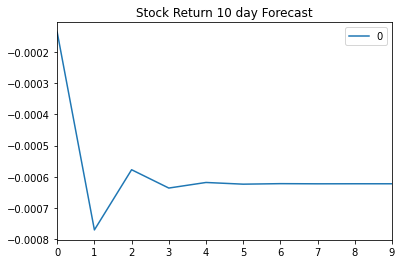

In [25]:
results_df.plot(title = 'Stock Return 10 day Forecast')

p-value (probability value) - how likely it is that your data would have occurred by random chance

Reward models for fitting data accurately and punish them for various other information about the model

AIC = Akaike Information Criterion = lower the value is, the more accurate in general. Used to measure goodness of fit.

BIC = Bayesian Information Criterion = penalizes models for having a large number of parameters

In [27]:
#summarize model performance metrics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1225
Model:                     ARMA(1, 1)   Log Likelihood                2833.110
Method:                       css-mle   S.D. of innovations              0.024
Date:                Wed, 01 Dec 2021   AIC                          -5658.220
Time:                        19:14:13   BIC                          -5637.777
Sample:                             0   HQIC                         -5650.527
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0006      0.001     -0.967      0.333      -0.002       0.001
ar.L1.Return    -0.3045      0.204     -1.494      0.135      -0.704       0.095
ma.L1.Return     0.2263      0.207      1.092      0.275      -0.180       0.633
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.2839           +0.0000j            3.2839            0.5000
MA.1           -4.4191           +0.0000j            4.4191            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Return'],order=(1,1,2))

#an ARMA(1,1) = ARIMA(1,0,1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

In [32]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Return   No. Observations:                 1224
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2826.721
Method:                       css-mle   S.D. of innovations              0.024
Date:                Wed, 01 Dec 2021   AIC                          -5643.442
Time:                        19:24:24   BIC                          -5617.892
Sample:                             1   HQIC                         -5633.827
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -2.11e-06        nan        nan        nan         nan         nan
ar.L1.D.Return    -0.4506      0.131     -3.433      0.001      -0.708      -0.193
ma.L1.D.Return    -0.6186      0.117     -5.281      0.000      -0.848      -0.389
ma.L2.D.Return    -0.3774      0.151     -2.495      0.013      -0.674      -0.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2192           +0.0000j            2.2192            0.5000
MA.1            1.0029           +0.0000j            1.0029            0.0000
MA.2           -2.6422           +0.0000j            2.6422            0.5000
-----------------------------------------------------------------------------
"""

In [33]:
#plot the forecasted return for the next 10 days
results_df = pd.DataFrame(results.forecast(steps=10)[0])
results_df.head()

,0
0,-0.001555
1,-0.002320
2,-0.001979
3,-0.002135
4,-0.002068


<AxesSubplot:title={'center':'Stock Return 10 day Forecast'}>

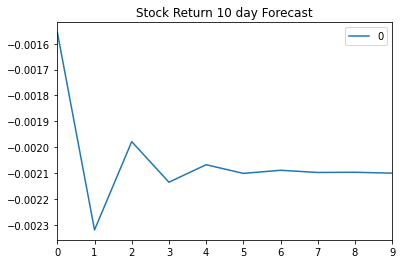

In [34]:
results_df.plot(title = 'Stock Return 10 day Forecast')

# Intro to Fourier Analysis

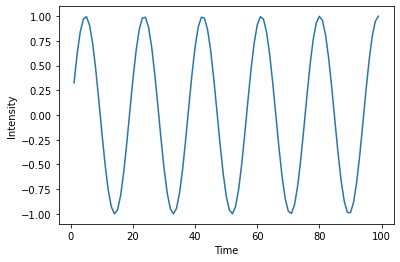

In [36]:
from scipy import signal

x = np.arange(1,100,1)
y = np.sin(x/3)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

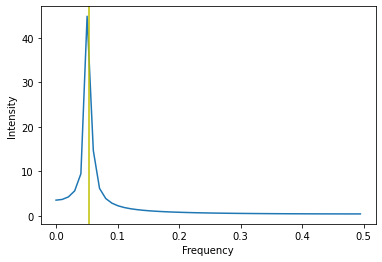

In [41]:
#power spectral density
psd = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
#amplitude
plt.axvline(1/(6*np.pi),c='y')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()